<a href="https://colab.research.google.com/github/YuanheZ/Score-matching-for-unnormalized-density-estimation/blob/main/Diffusion%20ODE%20DIY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [ ]:
def u(x, x0):
    t, x = map(float, x)
    x0 = float(x0)
    x1 = (x - x0 * t**2) / (1 - t**2)
    window = np.exp(-20 * (max(0, 0 - x1) + max(0, x1 - 1)))
    v = [1, 2*(x0-x)*t/(1-t**2)]
    rho = 1 / (1 - t**2)
    return np.array(v) * rho * window

In [ ]:
def plot_field_lines(u):
    for x_at_t_eq_0 in np.linspace(0, 1, 20):
        def f(t, x):
            assert 0 <= t <= 1
            # assert 0 <= x <= 1
            ut, ux = u((t, x))
            assert ut !=0, (t, x)
            return ux / ut
        result = scipy.integrate.solve_ivp(f, (0, 1-1e-5), [x_at_t_eq_0], max_step=1e-3, atol=1e-6, rtol=1e-10)
        plt.plot(result.t, result.y.squeeze(0), color='black')
    plt.show()

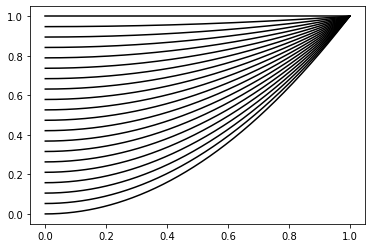

In [ ]:
plot_field_lines(lambda x: u(x, 1))

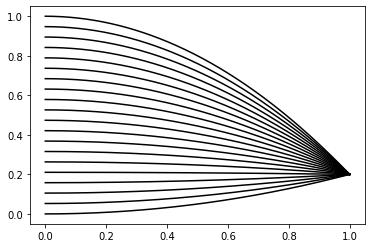

In [ ]:
plot_field_lines(lambda x: u(x, 0.2))

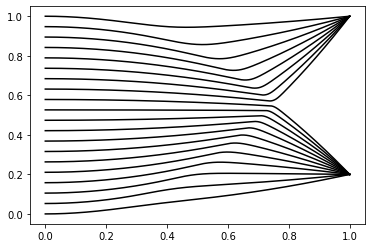

In [ ]:
plot_field_lines(lambda x: 6 * u(x, 0.2) + 4 * u(x, 1))